# LineIntegralConvolution.jl

Line Integral Convolution (LIC) visualization tool for vector fields

## Usage

In [85]:
using Random
using Plots

### Electrostatic Simulation 

#### Parameters

In [86]:
## image parameters
pt_per_meter = 25  # resolution, number of pixels per meter

x_min = -10
x_max = 10

y_min = 2
y_max = 13

n_charges = 10  # number of charges to simulate

charge_value = 1e-6  # electric charge value (C)

distribution = "circle"  # "circle", "random"

SEED = 2

2

#### Constants

For electric (E) field computation

In [87]:
epsilon_zero = 8.85e-12  # empty space dielectric constant
k = 1.0 / (4.0 * pi * epsilon_zero)  # constant, see electric field generated form a point source

8.991804694457363e9

#### Utils

In [88]:
function meshgrid(x_range, y_range)
    num_x_pts = length(x_range)
    num_y_pts = length(y_range)
    pts_x = zeros(num_y_pts, num_x_pts)
    pts_y = zeros(num_y_pts, num_x_pts)
    for cnt_x = 1 : num_x_pts
        for cnt_y = 1 : num_y_pts
            pts_x[cnt_y, cnt_x] = x_range[cnt_x]
            pts_y[cnt_y, cnt_x] = y_range[cnt_y]
        end
    end
    return (x=pts_x, y=pts_y)
end

meshgrid (generic function with 1 method)

#### Simulation

Compute the 2D electric field of equally charged 'point' sources printosed in a 2D plane


In [89]:
c_seed = SEED  # initialize SEED

step_m = 1.0 / pt_per_meter

pts_x = x_min : step_m : x_max
pts_y = y_min : step_m : y_max

# num_x_points = (x_max - x_min) * pt_per_meter + 1  # +1 to include both ends
# num_y_points = (y_max - y_min) * pt_per_meter + 1  # +1 to include both ends
num_x_points = length(pts_x)
num_y_points = length(pts_y)

points = meshgrid(pts_x, pts_y)
# points.x
# points.y

field_lin = zeros(num_y_points, num_x_points, 2)  # initialize zero electric field 
field_modulus = zeros(num_y_points, num_x_points)  # initialize the modulus only image

if distribution == "random"
    # generate a random position [x, y] for the new charges
    # the code below forces the position to be 'in the center'
    charge_x = rand(MersenneTwister(c_seed), Float64, n_charges) * (x_max-x_min) .+ x_min
    c_seed += 1
    charge_y = rand(MersenneTwister(c_seed), Float64, n_charges) * (y_max-y_min) .+ y_min
    c_seed += 1
    charge_q = rand(MersenneTwister(c_seed), (-1, 1), n_charges) .* charge_value
    c_seed += 1
elseif distribution == "circle"
    if n_charges > 1
        angles = 0.0 : 2.0pi / n_charges : 1.999pi
        c_cos = cos.(angles)
        c_sin = sin.(angles)
    else
        c_cos = 0.0
        c_sin = 0.0
    end
    charge_x = x_min + (x_max-x_min) / 2 .+ c_cos * (x_max-x_min) / 4 .+ rand(MersenneTwister(c_seed), Float64) * step_m / 100
    charge_y = y_min + (y_max-y_min) / 2 .+ c_sin * (y_max-y_min) / 4 .+ rand(MersenneTwister(c_seed), Float64) * step_m / 100
    charge_q = ones(n_charges) * charge_value
else
    error("Not implemented!")
end

10-element Vector{Float64}:
 1.0e-6
 1.0e-6
 1.0e-6
 1.0e-6
 1.0e-6
 1.0e-6
 1.0e-6
 1.0e-6
 1.0e-6
 1.0e-6

In [90]:
for i = 1 : n_charges  # for each electric charge
    # for each pixel of the image, compute the electric field in that point
    # relatively to the currently generated charge
 
    # compute the distance of the current pixel position with
    # respect to the charge position, scaling to make them 'physical'
    dist_x = points.x .- charge_x[i]
    dist_y = points.y .- charge_y[i]
    # compute the squared linear distance between source and pixel
    dist2 = dist_x .^ 2 .+ dist_y .^ 2

    # compute the electric field value for the current pixel
    values = (k * charge_value) ./ dist2
    
    field_modulus .+= abs.(values)

    den = abs.(dist_x) .+ abs.(dist_y)
    x_versor = dist_x ./ den
    y_versor = dist_y ./ den

    # add the field computed to the overall field in this point 
    # (superposition principle)
    field_lin[:, :, 1] .+= values .* x_versor
    field_lin[:, :, 2] .+= values .* y_versor
end

field_log = 10.0*log10.(field_modulus)

276×501 Matrix{Float64}:
 29.272   29.3023  29.3326  29.363   …  29.3632  29.3328  29.3025  29.2722
 29.2934  29.3239  29.3544  29.3849     29.3851  29.3546  29.3241  29.2937
 29.3148  29.3454  29.3761  29.4068     29.407   29.3763  29.3456  29.315
 29.3362  29.3669  29.3978  29.4286     29.4289  29.398   29.3672  29.3364
 29.3575  29.3884  29.4194  29.4505     29.4507  29.4196  29.3887  29.3577
 29.3788  29.4099  29.441   29.4723  …  29.4725  29.4413  29.4101  29.379
 29.4001  29.4313  29.4626  29.494      29.4943  29.4629  29.4316  29.4003
 29.4213  29.4527  29.4842  29.5158     29.516   29.4845  29.453   29.4216
 29.4425  29.4741  29.5058  29.5375     29.5377  29.506   29.4743  29.4428
 29.4637  29.4954  29.5273  29.5592     29.5594  29.5275  29.4957  29.4639
  ⋮                                  ⋱                              ⋮
 29.4427  29.4743  29.5059  29.5376     29.5379  29.5062  29.4745  29.4429
 29.4215  29.4529  29.4844  29.5159     29.5162  29.4846  29.4531  29.4217
 29.400

#### Figures

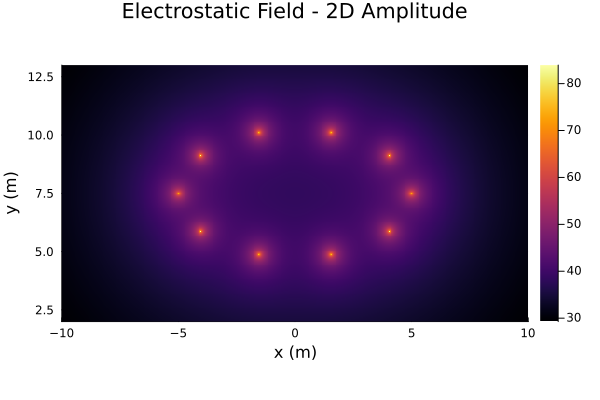

In [91]:
heatmap(
    pts_x,
    pts_y,
    field_log, 
    aspect_ratio=:equal,
    xlim=(x_min, x_max),
    ylim=(y_min, y_max)
)
title!("Electrostatic Field - 2D Amplitude")
xlabel!("x (m)")
ylabel!("y (m)")
# TODO colorbar label is missing

In [92]:
# scatter(
#     [charge_x], 
#     [charge_y],
#     zcolor=charge_q,
#     legend=false, 
#     markerstrokewidth=0, 
#     marker=:circle, 
#     markersize=5.0, 
#     aspect_ratio=:equal,
#     xlim=(x_min, x_max),
#     ylim=(y_min, y_max),
#     c=:rainbow
# )
# title!("Electric Charges - N=$n_charges (SEED=$SEED)")
# xlabel!("x (m)")
# ylabel!("y (m)")

### LIC

#### Parameters

In [93]:
SEED = 1  # Random Seed

struct Field2D
    pos_x
    pos_y
    val_x
    val_y
end

e_field = Field2D(
    pts_x, 
    pts_y,
    field_lin[:, :, 1],
    field_lin[:, :, 2]
)

kernel_size = 30
kernel_lpf = ones(kernel_size) / kernel_size

kernel_cos = cos.(0.0 : pi / (2.0* kernel_size) : pi/2.0)
kernel_cos = kernel_cos / sum(kernel_cos)

kernel = kernel_cos

31-element Vector{Float64}:
 0.051035433285120224
 0.0509654909975177
 0.05075585584165883
 0.05040710241293426
 0.04992018662025056
 0.04929644306595037
 0.04853758138776017
 0.047645681572792024
 0.046623188256443585
 0.04547290402182231
 ⋮
 0.020757980812308768
 0.01828946358054451
 0.015770816200391002
 0.013208942109248232
 0.010610863225926307
 0.007983700704054178
 0.00533465541349248
 0.0026709882032497382
 3.125019000786039e-18

#### Initialization

In [94]:
image_width = length(e_field.pos_y)
image_height = length(e_field.pos_x)

## initial random image
random_image = rand(MersenneTwister(c_seed), image_width, image_height) .- 0.5
c_seed += 1

# new images
img = zeros(length(e_field.pos_y), length(e_field.pos_x))

# heatmap(
#     pts_x,
#     pts_y,
#     random_image, 
#     aspect_ratio=:equal,
#     xlim=(x_min, x_max),
#     ylim=(y_min, y_max)
# )
# title!("Initial Random Image")

276×501 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [95]:
# compute LIC

theta_mat = atan.(field_lin[:, :, 1], field_lin[:, :, 2])
Δx = sin.(theta_mat)
Δy = cos.(theta_mat)
abs_sin = abs.(Δx)
abs_cos = abs.(Δy)

target_num_prints = 10

for x = 1 : image_width
    for y = 1 : image_height

        if rand() > 1.0 - target_num_prints / (image_width * image_height)
            print((((x * (image_height-1) + y)/(image_width * image_height))*100), " %\n");
        end

        c_pix = random_image[x, y] * kernel[1]
        xp = x
        yp = y
        cdx = 0
        cdy = 0
        for w = 2 : kernel_size

            cdx += Δx[xp, yp]
            cdy += Δy[xp, yp]

            # compute new position pixel
            xpc = x + Int(round(cdx))
            ypc = y + Int(round(cdy))

            # check new position is valid
            if xpc < 1
                xpc = 1
            elseif xpc > image_width
                xpc = image_width
            end
            if ypc < 1
                ypc = 1
            elseif ypc > image_height
                ypc = image_height
            end

            # interpolate

            c_pix += random_image[xpc, ypc] * kernel[w]

            # norm_factor = (1 - abs_cos[xp, yp]) * (1 - abs_sin[xp, yp])
            # c_pix += random_image[xp, yp] * kernel[w] * norm_factor

            # norm_factor = abs_cos[xp, yp]
            # c_pix += random_image[xpc, yp] * kernel[w] * norm_factor

            # norm_factor = abs_sin[xp, yp]
            # c_pix += random_image[xp, ypc] * kernel[w] * norm_factor
            
            # norm_factor = abs_cos[xp, yp] * abs_sin[xp, yp]
            # c_pix += random_image[xpc, ypc] * kernel[w] * norm_factor

            xp = xpc
            yp = ypc
        end
        
        # new_image[x, y, 1] = (current_pixel2 + .5) * 0.5 + (field_log[x, y]) * 0.5
        # new_image[x, y, 2] = (current_pixel2 + .5) * 0.5 + (field_log[x, y]) * 0.5 
        # new_image[x, y, 3] = (current_pixel2 + .5) * 0.5 + (1 - field_log[x, y]) * 0.5

        img[x, y] = c_pix
    end
end

3.084410888368191 %
3.8090485695276115 %
6.100841794671527 %


9.036998466834447 %


25.883016575544566 %


63.40507391015071 %
64.36547195464144 %


76.53533512684776 %


93.75668951951171 %


#### Figures

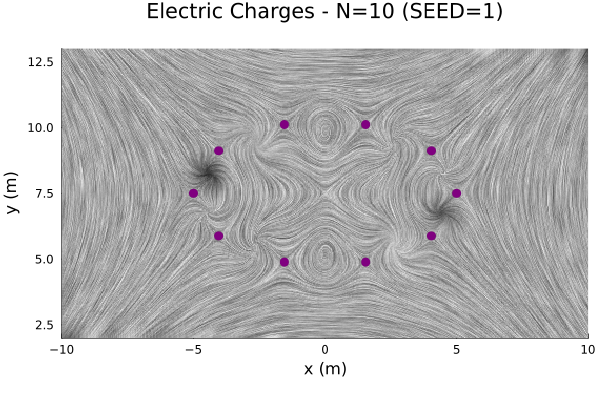

In [98]:
heatmap(
    pts_x,
    pts_y,
    img .+ 0.5,
    aspect_ratio=:equal,
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    c=:grays
)
title!("LIC (LPF)")
scatter!(
    [charge_x], 
    [charge_y],
    zcolor=charge_q,
    legend=false, 
    markerstrokewidth=0, 
    marker=:circle, 
    markersize=5.0, 
    aspect_ratio=:equal,
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    c=:rainbow,
    colorbar=false
)
title!("Electric Charges - N=$n_charges (SEED=$SEED)")
xlabel!("x (m)")
ylabel!("y (m)")

In [101]:
savefig("data/electric_charges.pdf")  # export to PDF vectorial image
savefig("data/electric_charges.png")  # export to PNG

"/Users/davide/Documents/SW Projects/LineIntegralConvolution.jl/data/electric_charges.png"